In [21]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Hard Dist SVDD

In [7]:
train_loss_wo_bn = pd.read_csv('../eval/train_loss_wo_bn.txt', names=['loss'])
train_loss_wo_bn = train_loss_wo_bn.reset_index().rename(columns={'index': 'epoch'})
train_loss_wo_bn

,epoch,loss
0,0,8.168442e+07
1,1,6.930517e+07
2,2,5.828069e+07
3,3,4.848985e+07
4,4,3.983880e+07
...,...,...
8046,8046,2.614140e+01
8047,8047,2.613547e+01
8048,8048,2.612284e+01
8049,8049,2.611509e+01


In [12]:
eval_wo_bn = pd.read_csv('../eval/eval_metrics_wo_bn_per50iter.txt', sep=' ', names=['accuracy', 'precision', 'recall', 'f1'])
eval_wo_bn = eval_wo_bn.reset_index().rename(columns={'index': 'epoch'})
eval_wo_bn['epoch'] = eval_wo_bn['epoch'] * 50
eval_wo_bn

,epoch,accuracy,precision,recall,f1
0,0,0.979167,0.979167,0.979167,0.979167
1,50,0.979167,0.979167,0.979167,0.979167
2,100,0.979167,0.979167,0.979167,0.979167
3,150,1.000000,1.000000,1.000000,1.000000
4,200,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...
157,7850,0.979167,0.979167,0.979167,0.979167
158,7900,0.979167,0.979167,0.979167,0.979167
159,7950,0.979167,0.979167,0.979167,0.979167
160,8000,0.979167,0.979167,0.979167,0.979167


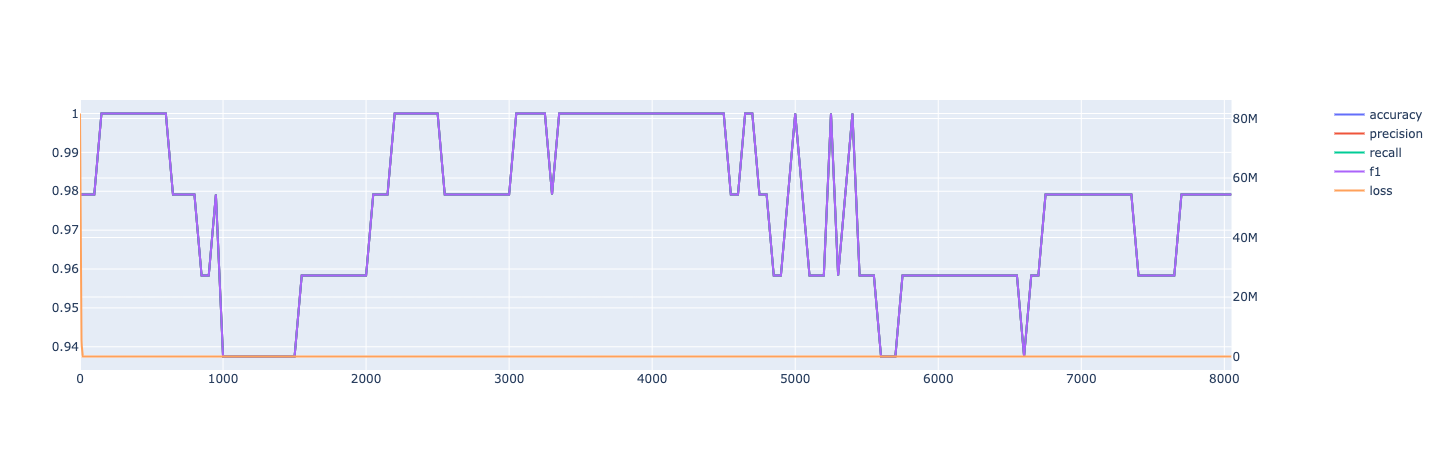

In [33]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

for metric in eval_wo_bn.columns[1:]:
    fig.add_trace(
        go.Scatter(x=eval_wo_bn['epoch'], y=eval_wo_bn[metric],
                   mode='lines',
                   name=metric),
        secondary_y=False
    )

fig.add_trace(
    go.Scatter(x=train_loss_wo_bn['epoch'], y=train_loss_wo_bn['loss'],
                mode='lines',
                name='loss'),
    secondary_y=True,
    
)

## Hard Dist SVDD with batch norm

In [34]:
train_loss_bn = pd.read_csv('../eval/train_loss_bn.txt', names=['loss'])
train_loss_bn = train_loss_bn.reset_index().rename(columns={'index': 'epoch'})
train_loss_bn

,epoch,loss
0,0,9.922408
1,1,8.425003
2,2,7.257384
3,3,6.393667
4,4,5.790523
...,...,...
5946,5946,0.002332
5947,5947,0.002329
5948,5948,0.002326
5949,5949,0.002324


In [35]:
eval_bn = pd.read_csv('../eval/eval_metrics_bn_per50iter.txt', sep=' ', names=['accuracy', 'precision', 'recall', 'f1'])
eval_bn = eval_bn.reset_index().rename(columns={'index': 'epoch'})
eval_bn['epoch'] = eval_bn['epoch'] * 50
eval_bn

,epoch,accuracy,precision,recall,f1
0,0,1.000000,1.000000,1.000000,1.000000
1,50,0.875000,0.875000,0.875000,0.875000
2,100,0.875000,0.875000,0.875000,0.875000
3,150,0.875000,0.875000,0.875000,0.875000
4,200,0.875000,0.875000,0.875000,0.875000
...,...,...,...,...,...
115,5750,0.583333,0.583333,0.583333,0.583333
116,5800,0.583333,0.583333,0.583333,0.583333
117,5850,0.583333,0.583333,0.583333,0.583333
118,5900,0.583333,0.583333,0.583333,0.583333


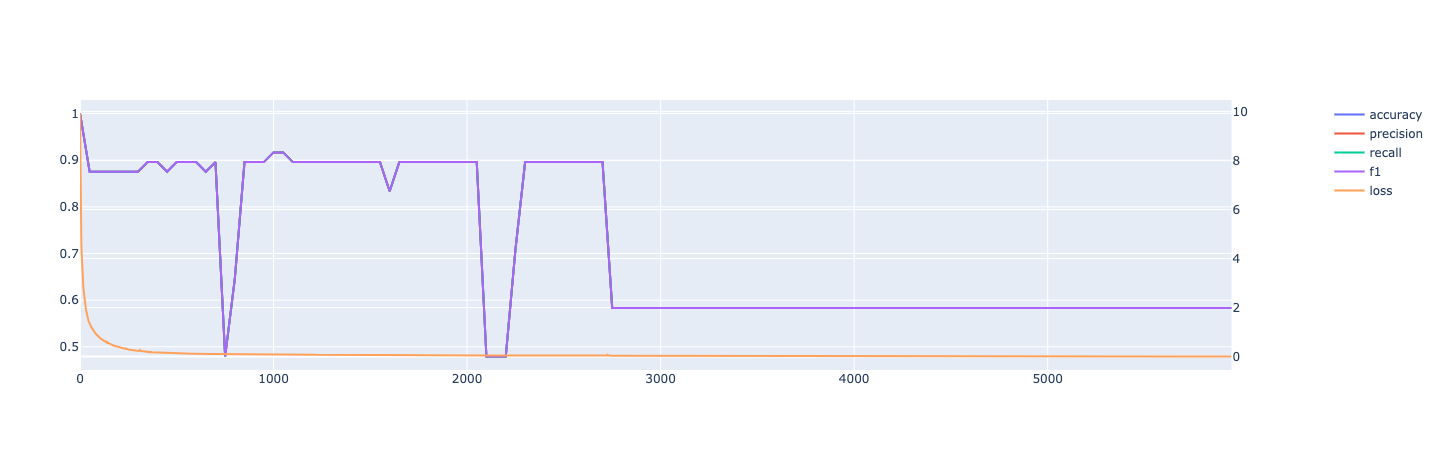

In [36]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

for metric in eval_bn.columns[1:]:
    fig.add_trace(
        go.Scatter(x=eval_bn['epoch'], y=eval_bn[metric],
                   mode='lines',
                   name=metric),
        secondary_y=False
    )

fig.add_trace(
    go.Scatter(x=train_loss_bn['epoch'], y=train_loss_bn['loss'],
                mode='lines',
                name='loss'),
    secondary_y=True,
    
)